###### CS-370 Final Project: Analysis of Trending YouTube Videos in Canada
By: Anna-Katharina Sersch, Sam Straus, Ari Thomason & Conor Krystad

__Data Source:__ https://www.kaggle.com/datasnaek/youtube-new
__Time frame of analysis:__ 1 year



Our goal with this project was to analyze data on trending YouTube videos, and discover patterns within that dataset. We chose this project because YouTube captues a lot of humans attention and what it puts on it's front page will influence what ideas and information people are exposed too.
We also chose this data set because every video had sixteen different features that we could use for analysis, this allowed us to apply many of the statistical methods we've learned in this class. But our central focuses was on video tags and video categories. 

Initial Research Questions: 
* Is there a relationship between video views and time posted? 
* What tags are the most and least common among trending videos?
* What genres of videos are promoted on to the front page? 
* Do different types of videos have different thresholds to reach the trending page?
* What channel had the most videos on the trending page?
* Are the most popular videos generally made by the same creators or not?
* How could you define of “popularity” of a video? Perhaps through an analysis of the like-dislike ratio and view count? 
* Does the national origin of videos effect it's popularity on the trending page?



## Imports
* Imported `pandas` and `numpy` for `DataFrame` and array manipulation among other uses
* Imported `seaborn` and `matplotlib.pyplot` for visualization
* Imported `datetime` to reformat/standardize `Trending` and `Published` columns

In [3]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

## Raw Data Set
Although we intitally planned on analysing the data of multiple counrties many data sets had unfixable problems. Some were too small for meaningful analysis, some were sparse and missing data, and other were not in a language that any group member could read. We thought of using google translate but didn't thinkn that was methodologically sound.
We settled on using the trending data from Canada (`CAvideos.csv`), which contained 40881 videos. 

In [4]:
raw = pd.read_csv('CAvideos.csv')
print(raw.shape)
raw.head(3)

(40881, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


# Clean Data

## Dropping Columns
Five columns were removed since they didn't provide useful or interesting information.

* `video_id` was removed sice it was a random string of characters and numbers for cataloging videos 
* `thumbnail_link` was removed since it only provided a link to an image
* `comments_disabled`, `ratings_disabled`, and `video_error_or_removed` were all removed as they were False for almost all videos  

In [5]:
df = raw.drop(['video_id','thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed'],axis=1)
df.head(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


## Rename Columns
All columns were renamed for consistency and clarity

* `trending_date`, `channel_title`, `publish_time`, and `comment_count` were shortened to `Trending`, `Channel`, `Published`, and `Comments**
* `title`, `tags`, `views`, `likes`, `dislikes`, and `description` were all capitalized
* `category_id` was condensed into `CategoryID` to follow camel-case like other columns 

In [6]:
df = df.rename(columns={'trending_date':'Trending','title':'Title','channel_title':'Channel','category_id':'CategoryID','publish_time':'Published','tags':'Tags','views':'Views','likes':'Likes','dislikes':'Dislikes','comment_count':'Comments','description':'Description'})
print(df.shape)
df.head(3)

(40881, 11)


,Trending,Title,Channel,CategoryID,Published,Tags,Views,Likes,Dislikes,Comments,Description
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


## Clean Duplicates
Some videos trended the multiple times, which means that they appeared in the dataset multiple times. We initially considered putting multiple dates in the `Trending` column, although we decided against this since it made any analysis that involved trending date more difficult. We also reasoned that if a video reached the trending page more than once it isn't a duplicate in the data set, so it's fair to include it multiple times.

In [7]:
dup_df = pd.pivot_table(df.drop("Trending",axis=1),index=['Title'],aggfunc='size')

dup_df = dup_df.sort_values(ascending=False).head(10)

[Text(0.5, 0, 'Times Trending')]

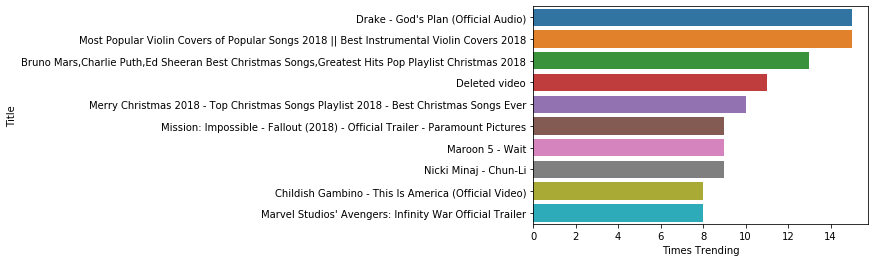

In [8]:
bar_DupTopTen = sns.barplot(x=dup_df,y=dup_df.head(10).index)
bar_DupTopTen.set(xlabel='Times Trending')

## Reformat `Trending` and `Published` Column 
The `Trending` column was originally in the American format YY-DD-MM, but we changed to a `datetime.date` object followed ISO format: YYYY-MM-DD. This reformatting was also done to the `Published` column.

In [9]:
for i in df.index:
    oldDate = df.at[i,'Trending']
    oldDate = oldDate.split('.')
    #reformat 'oldDate': currently for [a,b,c] a=year,b=day,c=month
    nuDate = datetime.date(int(oldDate[0])+2000,int(oldDate[2]),int(oldDate[1]))
    df.at[i,'Trending'] = nuDate

In [10]:
for i in df.index:
    oldDate = df.at[i,'Published']
    oldDate = datetime.datetime.fromisoformat(oldDate[:-1])
    #reformat 'oldDate': currently in datetime.datetime format (which is annoying and excessive)
    nuDate = datetime.date(oldDate.year,oldDate.month,oldDate.day)
    df.at[i,'Published'] = nuDate

In [11]:
df.head(3)

,Trending,Title,Channel,CategoryID,Published,Tags,Views,Likes,Dislikes,Comments,Description
0,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...
1,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


# Regrouping
To see trends over the seven months worth of data we bucketed the videos into just the month that they trended

In [12]:
#trial and much error ;-;
trendingMonth = pd.to_datetime(df['Trending']).dt.to_period('M')
df['TrendingMonth'] = trendingMonth

# Visualization
For our visualizations we used seaborn to show descriptive statistics and display correlations in our data. The style '**whitegrid**' was the chosen for simplicity, and '**poster**' provides easy to read fonts and graphs

In [13]:
sns.set(style='whitegrid',context='poster')

# `CategoryID`

## Sort by `CategoryID`
We first investigated `CategoryID` as it describes what the content of the video is and therefore might be the most important feature of each video

In [14]:
category_df = df.sort_values(by='CategoryID')
category_df.head(3)

,Trending,Title,Channel,CategoryID,Published,Tags,Views,Likes,Dislikes,Comments,Description,TrendingMonth
20440,2018-02-26,The Voice S04E03 ذا فويس الحلقه 3 الثالث الموس...,Top Movies,1,2018-02-24,ذا فويس الحلقه 3,136873,1480,157,387,The Voice S04E03 ذا فويس الحلقه 3 الثالث الموس...,2018-02
27727,2018-04-04,Honest Trailers - Jumanji: Welcome To The Jungle,Screen Junkies,1,2018-04-03,"screenjunkies|""screen junkies""|""the rock""|""jum...",1063506,38117,616,3472,"Enter Jumanji, the game that literally reboote...",2018-04
27717,2018-04-03,Westworld Season 2 | Official Trailer | HBO,HBO,1,2018-03-29,"HBO|""Westworld""|""Evan Rachel Wood""|""JJ Abrams""...",8332372,51585,1907,4767,Chaos takes control. Westworld season 2 premie...,2018-04


## Find Unique `CategoryID`
The unique values that appeared in the `CategoryID` column were found and matched through the [YouTube API V3 Category ID List](https://gist.github.com/dgp/1b24bf2961521bd75d6c) from Dinesh Gowtham Prathap. You may notice that some categories never had a trending video. So we filtered our list to only print out and show categories with trending videos. 

### Relevant `CategoryID` Index
* 1: Film and Animation
* 2: Autos and Vehicles
* 10: Music
* 15: Pets and Animals
* 17: Sports
* 19: Travel and Events
* 20: Gaming
* 22: People and Blogs
* 23: Comedy
* 24: Entertainment
* 25: News and Politics
* 26: Howto and Style
* 27: Education
* 28: Science and Technology
* 29: Nonprofits and Activism
* 30: Movies
* 43: Shows

In [15]:
category_list = category_df['CategoryID'].unique()
category_list

array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 43])

## `CategoryID` Video Count
### The number of videos in each `CategoryID` value was counted
The **Entertainment** category had the most trending videos more than triple than second place **News and Politics**. The **Shows** had the fewest videos trending with only six.

Altough there are many categories that never had a trending video, we suspect that this could be because those categories have been discontinued. For example ID's 31-39 are different genres of movies, including "Comedy", "Drama", "Documentry". These may have all been subsumed the "movie" category ID 30 

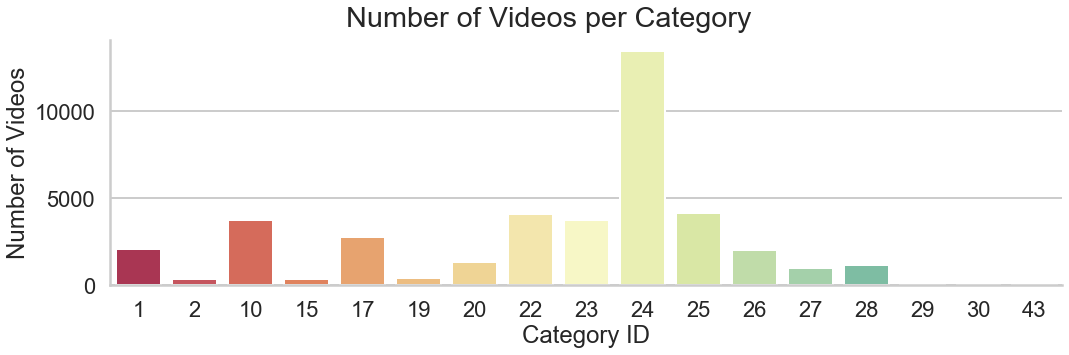

In [15]:
count_VidCat = sns.catplot(x='CategoryID',data=df,kind='count',aspect=3,palette='Spectral')
count_VidCat.fig.suptitle('Number of Videos per Category',y=1.02)
count_VidCat.set(xlabel='Category ID',ylabel='Number of Videos')
plt.show()

In [16]:
for i in category_list:
    cat = df[df['CategoryID']==i]
    print('Category ID = %d: \tContains %d videos'%(i,len(cat)))

Category ID = 1: 	Contains 2060 videos
Category ID = 2: 	Contains 353 videos
Category ID = 10: 	Contains 3731 videos
Category ID = 15: 	Contains 369 videos
Category ID = 17: 	Contains 2787 videos
Category ID = 19: 	Contains 392 videos
Category ID = 20: 	Contains 1344 videos
Category ID = 22: 	Contains 4105 videos
Category ID = 23: 	Contains 3773 videos
Category ID = 24: 	Contains 13451 videos
Category ID = 25: 	Contains 4159 videos
Category ID = 26: 	Contains 2007 videos
Category ID = 27: 	Contains 991 videos
Category ID = 28: 	Contains 1155 videos
Category ID = 29: 	Contains 74 videos
Category ID = 30: 	Contains 6 videos
Category ID = 43: 	Contains 124 videos


Category IDs in desending order, and how many trending videos each one had.

We'd consider this area of analysis at least a partial success! Clearly, some genres are far more likely to trend than others

In [17]:
print("ID    Videos")
print(category_df['CategoryID'].value_counts())

ID    Videos
24    13451
25     4159
22     4105
23     3773
10     3731
17     2787
1      2060
26     2007
20     1344
28     1155
27      991
19      392
15      369
2       353
43      124
29       74
30        6
Name: CategoryID, dtype: int64


## Number of `Trending` Videos by `CategoryID` per `TrendingMonth`

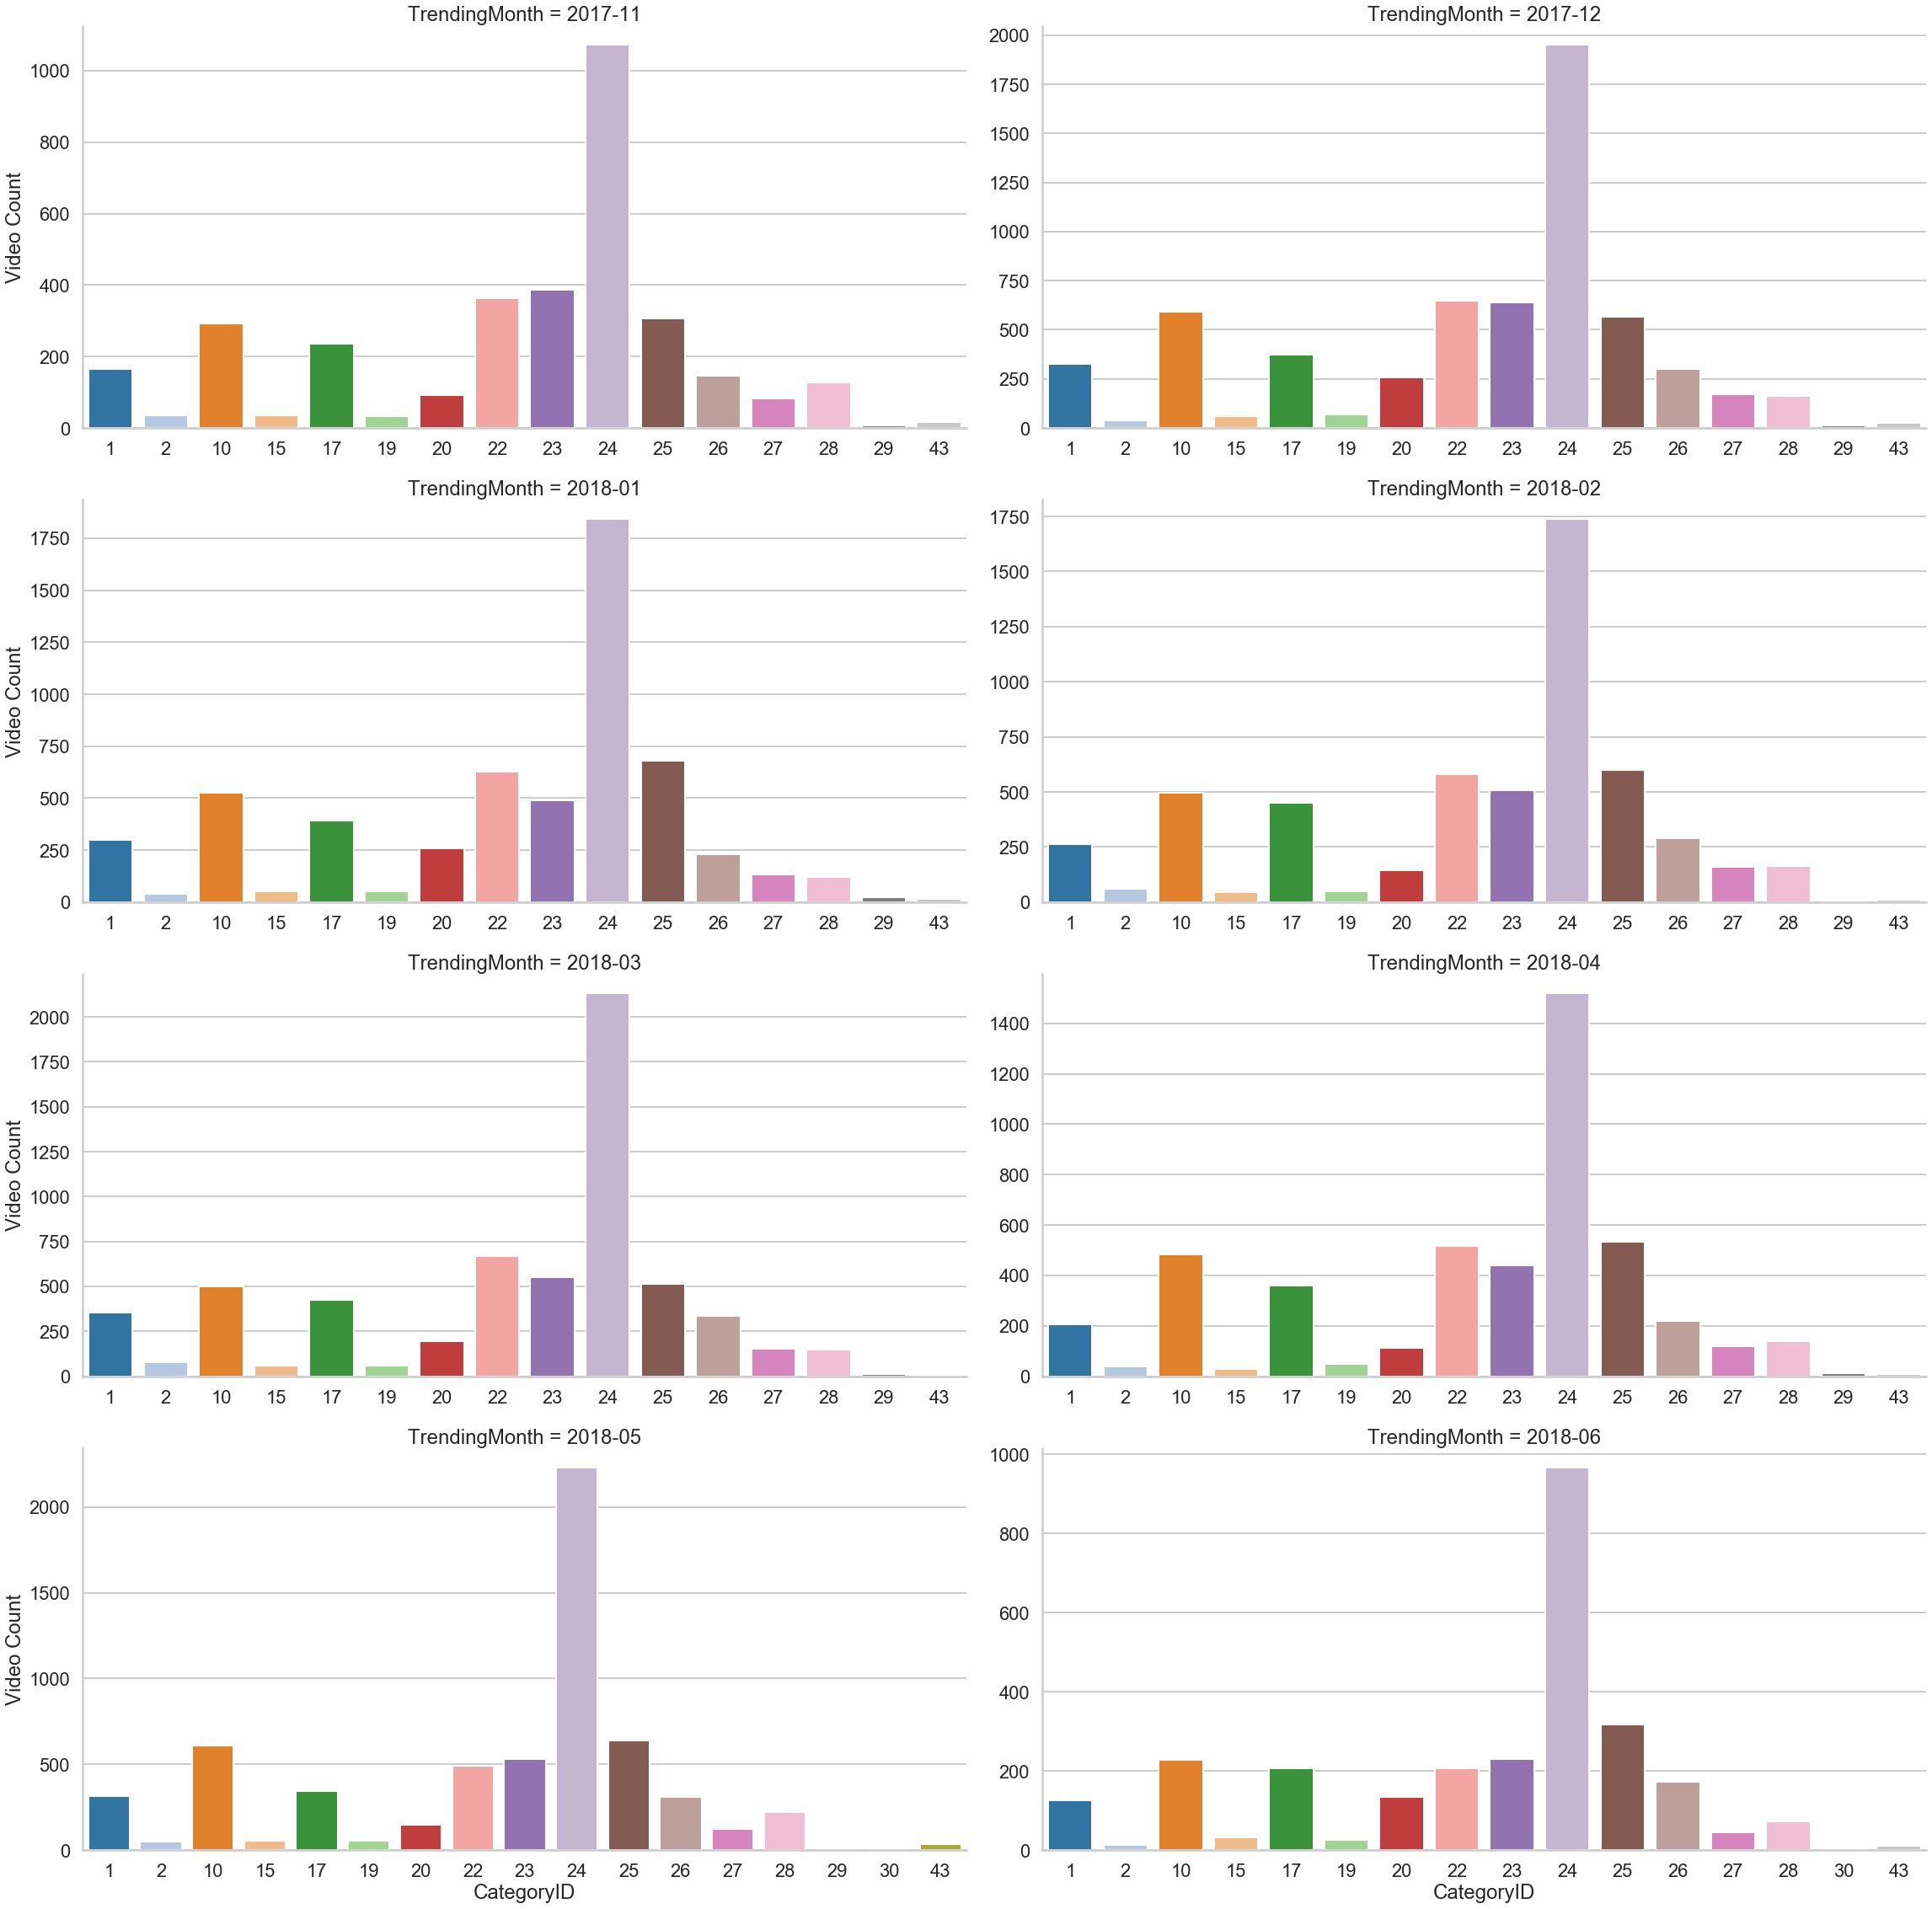

In [18]:
count_TrendCatMonth = sns.FacetGrid(df,col='TrendingMonth',height=8,col_wrap=2,
                                    aspect=2,sharex=False,sharey=False)
count_TrendCatMonth = count_TrendCatMonth.map(sns.countplot,'CategoryID',palette='tab20')
count_TrendCatMonth.set_axis_labels('CategoryID','Video Count')

## Mean `Views` by `CategoryID`
For each `CategoryID`, the **number** of `Views` for each video within every category was **averaged** out, so as to determine the **mean number** of `Views` per `CategoryID`.
### Short Analysis
Despite the underwhelming number of videos from the **Shows** category, it can be seen that they by no means lose out to many of the other categories in terms of average views.

It is also notable that, although **Entertainment** contained the largest number of videos by a large margin, the number of views was ranked 7th in terms of mean views, while the highest average views being the **Music** category, closely followed by the **Movies** category. More data on this is required, but as armchair scientists, it seems likely that people are listening to music on Youtube in the background which would inflate the view count.

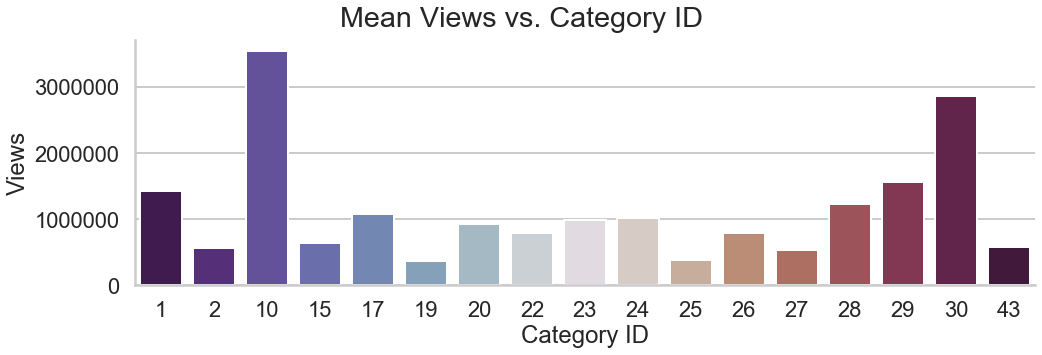

In [19]:
bar_ViewCat = sns.catplot(x='CategoryID',y='Views',data=df,kind='bar',ci=None,aspect=3,palette='twilight_shifted')
bar_ViewCat.fig.suptitle('Mean Views vs. Category ID',y=1.02)
bar_ViewCat.set(xlabel='Category ID',ylabel='Views')
plt.show()

In [20]:
catID_meanViews = []
for i in category_list:
    mean_val = df[df['CategoryID']==i]['Views'].mean()
    print('Category ID = %d: \tMean views = %d'%(i,mean_val))
    catID_meanViews.append((i,mean_val))

Category ID = 1: 	Mean views = 1426728
Category ID = 2: 	Mean views = 566759
Category ID = 10: 	Mean views = 3532524
Category ID = 15: 	Mean views = 638461
Category ID = 17: 	Mean views = 1075583
Category ID = 19: 	Mean views = 366701
Category ID = 20: 	Mean views = 923759
Category ID = 22: 	Mean views = 786413
Category ID = 23: 	Mean views = 982888
Category ID = 24: 	Mean views = 1016371
Category ID = 25: 	Mean views = 388220
Category ID = 26: 	Mean views = 782683
Category ID = 27: 	Mean views = 536602
Category ID = 28: 	Mean views = 1233844
Category ID = 29: 	Mean views = 1562184
Category ID = 30: 	Mean views = 2853415
Category ID = 43: 	Mean views = 577012


# `Channel`


It seems that even though news is the 2nd  most common category for trending videos, those videos are heavily concentrated between a few popular channels, whereas other categories show more variety. Were we to continue with this project, that would be an interesting area of analysis, looking at what countries those news organizations are based in, what the tone of their videos is llike, where they fall on the political spectrum, etc. Or alternatively, to what extent and why do other categories show less concentration?

In [21]:
channel_list = df['Channel'].value_counts()
print(channel_list.head(5))

SET India          192
MSNBC              189
FBE                188
The Young Turks    186
REACT              183
Name: Channel, dtype: int64


# `Tags`

## List of `Tags` in Each Video
Initially, the `Tags` column was a single string listing out all of the tags for each video. As it was, it was difficult to make use of the information from the `Tags` column, so it was reformatted into something more useable. The string of tags for each video was then broken up into tokens, each token representing an individual tag. These tokens were compiled into a list, and the `Tags` column became a list of strings/tags. 

The "least common tag" is impossible to find, since there are hundreds of single-use tags. The most common tag, unsurprisingly though, is "funny". Ultimatley, this area of analysis didn't reveal many surprises, and wasn't as useful as others (especially for how long it took). The list of tags is long (about 5-8 per video for tens of thousands of videos) and creating Seaborn visualizations really stretches the limits of what Python and our machines are capable of. Were we to continue this analysis in the future, one of the things we would definitley do is use a different programming language to work with this list.

In [22]:
taglist=[]
for i in df.index:
    taglist = df.at[i,'Tags']
    taglist = taglist.replace('"',"")
    taglist = taglist.split('|')
    df.at[i,'Tags'] = taglist
df.head(3)

,Trending,Title,Channel,CategoryID,Published,Tags,Views,Likes,Dislikes,Comments,Description,TrendingMonth
0,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,"[Eminem, Walk, On, Water, Aftermath/Shady/Inte...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...,2017-11
1,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13,"[plush, bad unboxing, unboxing, fan mail, idub...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...,2017-11
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"[racist superman, rudy, mancuso, king, bach, r...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11


## Unique Values of `Tags`
The unique values of `Tags` were found

In [23]:
#Split tags individually
tag_list = [tag for tagstring in df['Tags'] for tag in tagstring]
len(tag_list)
df.head(1)

,Trending,Title,Channel,CategoryID,Published,Tags,Views,Likes,Dislikes,Comments,Description,TrendingMonth
0,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,"[Eminem, Walk, On, Water, Aftermath/Shady/Inte...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...,2017-11


In [24]:
#Delete duplicate tags
tag_unique = list(set(tag_list))
len(tag_unique)

151513

## `Tag` Usage
The number of times a `Tag` was counted for all unique `Tag` values. The top then tags, by count, were then displayed.

As you can see, the most common tags were **funny** and **comedy**, which corresponds to the fact that Entertainment is by far the most trending category of videos. Interestingly enough **news** is the fourth most popular tag but it does not correspond to a particularly popular category. 

In [25]:
tag_use = []

for tag in tag_unique:
    t_sum = 0
    for t_list in df['Tags']:
        if tag in t_list:
            t_sum += 1
    #print('Tag: %s\tCount: %d'%(tag,t_sum))
    tag_use.append((tag,t_sum))

tag_use.sort(key=lambda x:x[1],reverse=True)
for (tag,t_sum) in tag_use[:10]:
    print('Tag: %s\t Count: %d' %(tag, t_sum))
    
    # Sort them, print out top 20? 

Tag: funny	 Count: 3416
Tag: comedy	 Count: 2432
Tag: [none]	 Count: 2385
Tag: news	 Count: 1452
Tag: 2018	 Count: 1147
Tag: video	 Count: 1034
Tag: politics	 Count: 1010
Tag: humor	 Count: 959
Tag: food	 Count: 915
Tag: review	 Count: 911


## Average Number of `Tags` by `CategoryID`
The **average** number of `Tags` used by videos in each `CategoryID` is displayed below as both a `boxplot` and a `catplot`. 

You can see here that the nonprofits and activism category far surpasses all the others in terms of average amount of tags per video. However the other categories do have far outliers as well, such as the Entertainment category. The graph below, shows the total tag count, displays a similar trend. This could be due to a number of things. I wonder if more of these channels ( corporate accounts) are likely to promote their videos mostly on other social media, whereas activist youtubers are better acquainted with the platform & more likely to maximize their searchability. I'd look at the correlation between tags and channel names if we were to examine this data further.

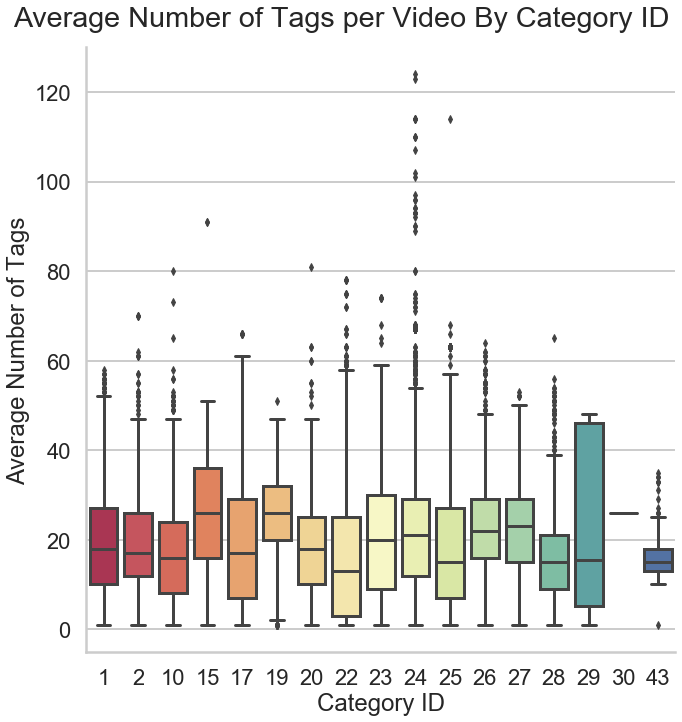

In [26]:
df['TagCount']=[len(taglist) for taglist in df['Tags']]
box_TagCat = sns.catplot(x='CategoryID',y='TagCount',data=df,ci=None,kind='box',height=10,palette='Spectral')
box_TagCat.fig.suptitle('Average Number of Tags per Video By Category ID',y=1.02)
box_TagCat.set(xlabel='Category ID',ylabel='Average Number of Tags')

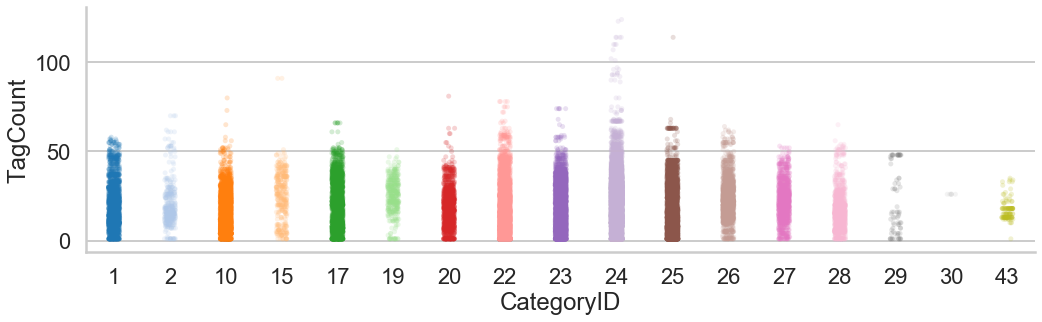

In [27]:
strip_TagCat = sns.catplot(x='CategoryID',y='TagCount',data=df,kind='strip',height=5,aspect=3,alpha=0.2,palette='tab20')

# Visualizations With Regards to `Views`

Overall:
"Style", "Education", "Gaming", "Sports" and "Vehicles" had some of the highest positive engagement, or ratio of likes to views. 
"Style", "Education", "Music", and "Shows" had some of the highest negative engagement, or ratio of dislikes to views. 
So out of those, "Style" and "Education" seem like categories of videos that people are especially likely to engage with one way or another. 
"News and Politics" and "Travel and Events" had low engagement overall, with few likes as well as few dislikes.
"Sports was notable for having high positive engagement (lots of likes!) but relatively few dislikes. Why that may be, we couldn't say. Maybe sports fans are just positive people?

## Number of `Likes` vs Number of `Views` by `CategoryID`
The below graphs are `scatterplots` for different `CategoryIDs`, where each point represents a video, and its coordinates are indicative of the number of `Views` (x-axis) and the number of `Likes` (y-axis) it received

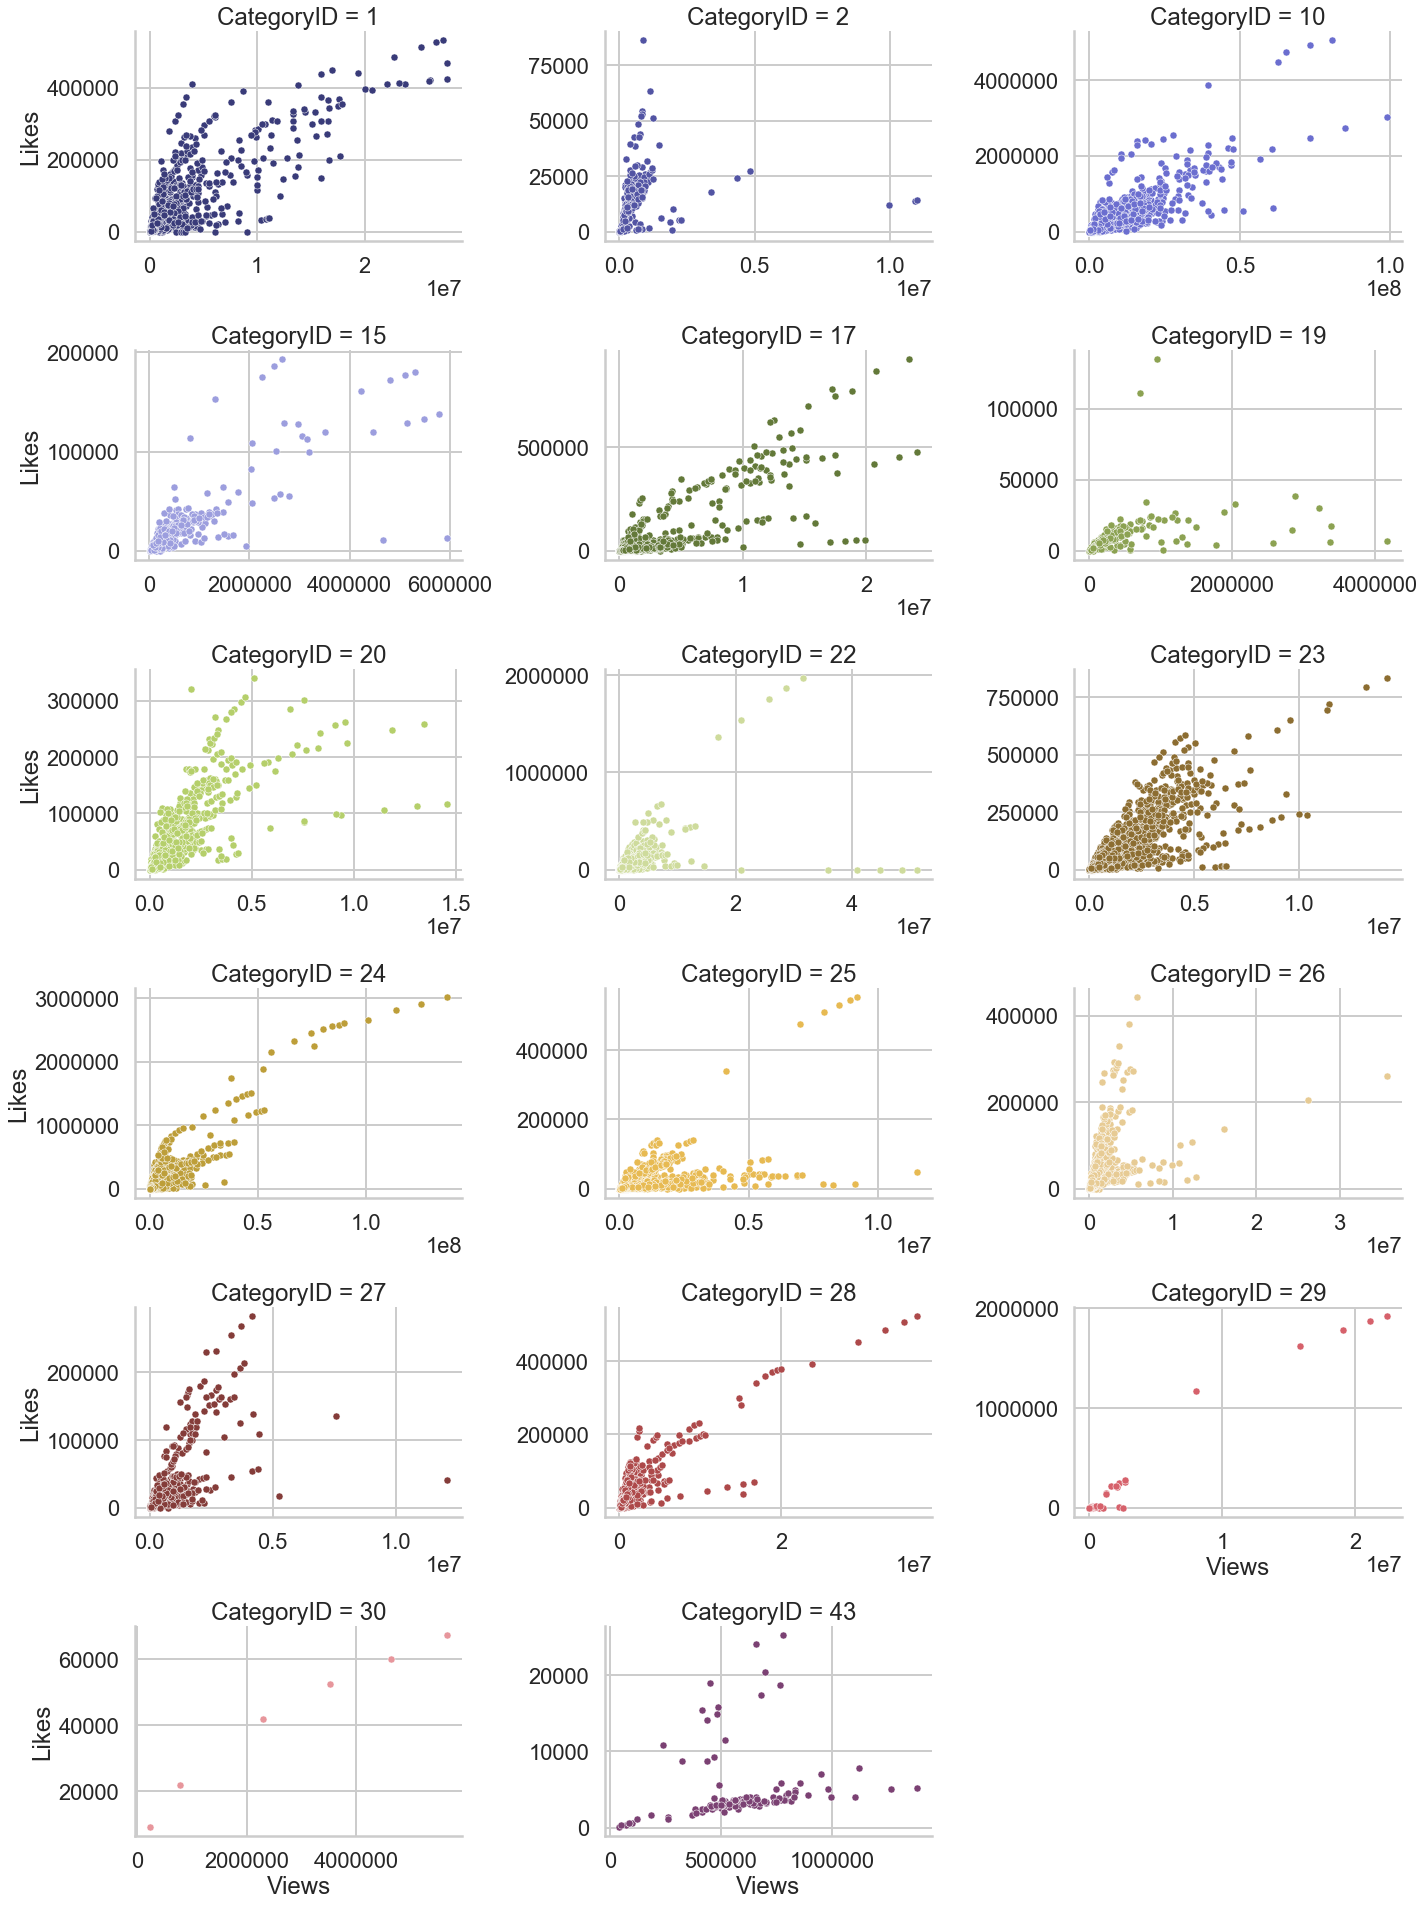

In [19]:
scatter_ViewLikeCat = sns.FacetGrid(df,hue='CategoryID',col='CategoryID',palette='tab20b',
                                    sharex=False,sharey=False,height=4.5,col_wrap=3,aspect=1.5)
scatter_ViewLikeCat = scatter_ViewLikeCat.map(plt.scatter,
                                              'Views','Likes',s=50,linewidth=.5,
                                             edgecolor='w')

## Number of `Dislikes` vs Number of `Views` by `CategoryID`
The below graphs are `scatterplots` for different `CategoryIDs`, where each point represents a video, and its coordinates are indicative of the number of `Views` (x-axis) and the number of `Dislikes` (y-axis) it received

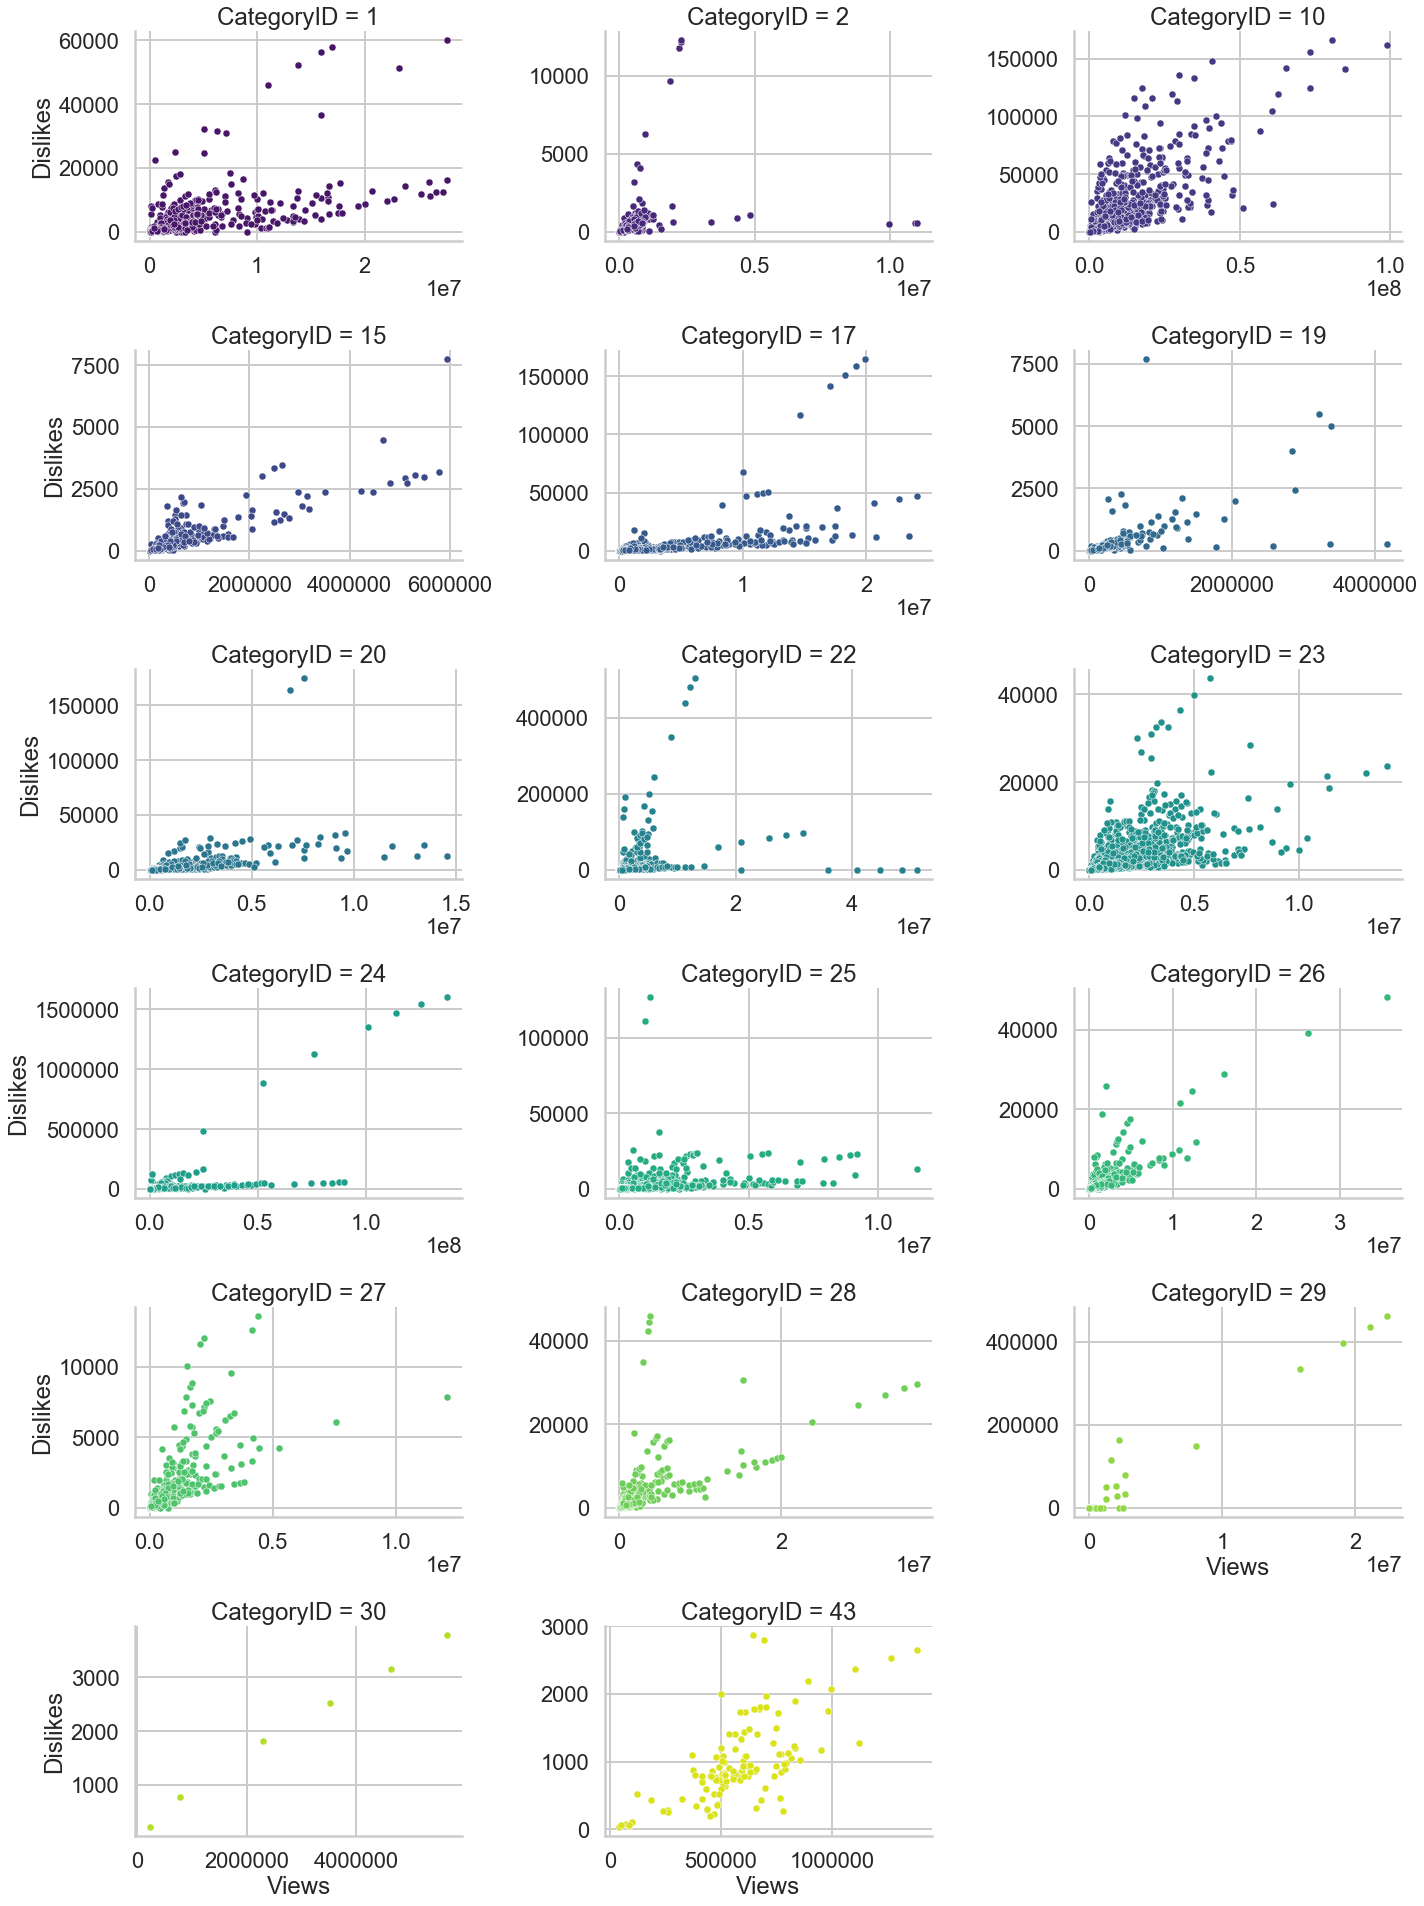

In [29]:
scatter_ViewDislikeCat = sns.FacetGrid(df,hue='CategoryID',col='CategoryID',palette='viridis',
                                    sharex=False,sharey=False,height=4.5,col_wrap=3,aspect=1.5)
scatter_ViewDislikeCat = scatter_ViewDislikeCat.map(plt.scatter,
                                              'Views','Dislikes',s=50,linewidth=.5,
                                             edgecolor='w')

## Number of `Comments` vs Number of `Views` by `CategoryID`
The below graphs are `scatterplots` for different `CategoryIDs`, where each point represents a video, and its coordinates are indicative of the number of `Views` (x-axis) and the number of `Comments` (y-axis) it received

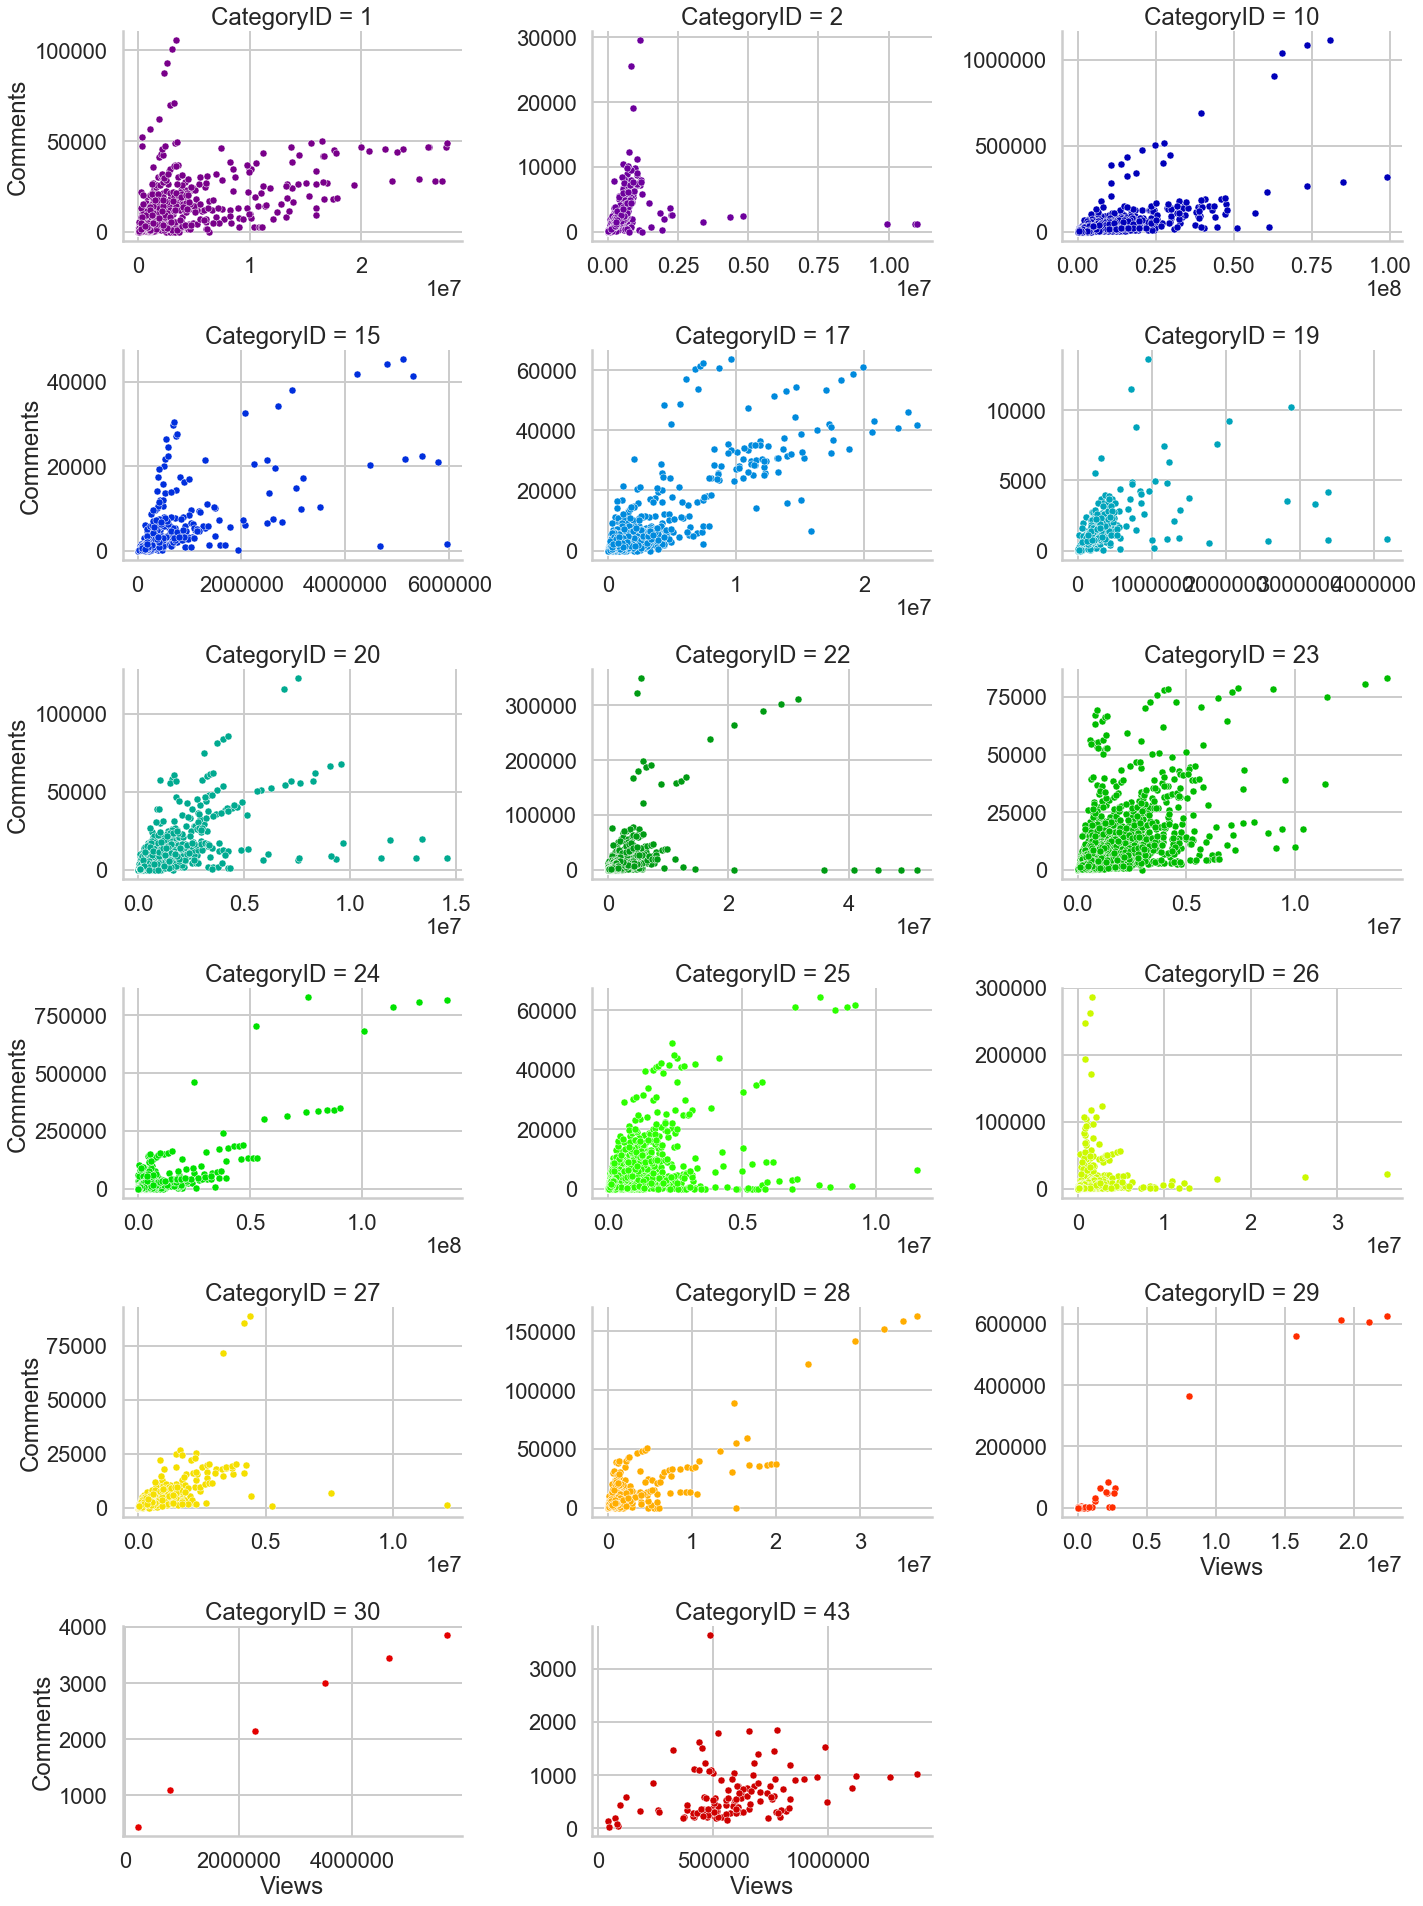

In [30]:
scatter_ViewCommentCat = sns.FacetGrid(df,hue='CategoryID',col='CategoryID',palette='nipy_spectral',
                                    sharex=False,sharey=False,height=4.5,col_wrap=3,aspect=1.5)
scatter_ViewCommentCat = scatter_ViewCommentCat.map(plt.scatter,
                                              'Views','Comments',s=50,linewidth=.5,
                                             edgecolor='w')

## Ratio of `Dislikes` to 'Likes' by `CategoryID`

The ratio of likes to dislikes should show how controversial a video is - a close number of likes and dislikes make it more contoversial, and vice versa. Dislikes/Likes returned reasonable values, but Likes/Dislikes didn't, because some categories had so many more likes than dislikes that most values were dwarfed by a couple of outliers.

Observations:  There was a lot of variation! "Pets and Animals" (15) was the least controversial category (most liked  compared to dislikes), and "Shows" (43) was the most controversial (most dislikes compared to likes).

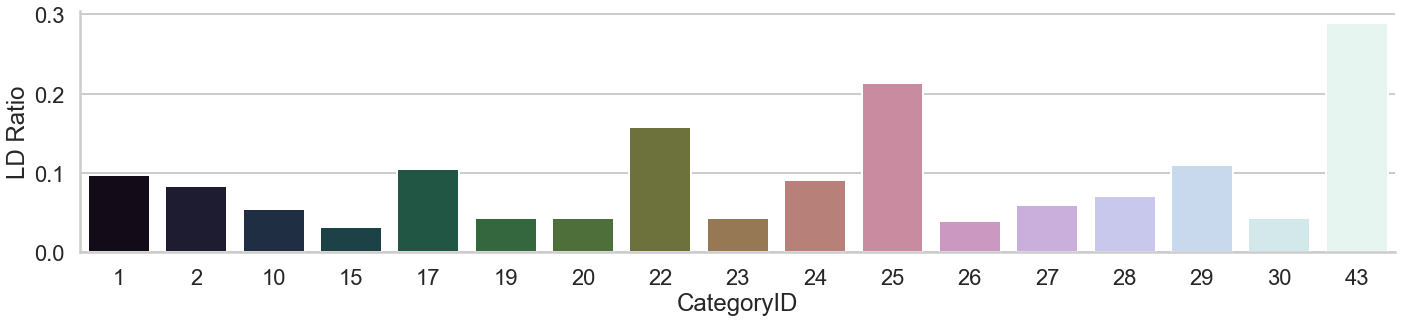

In [31]:
#Adding a likes to dislikes ratio column in the initial dataframe
df["LD Ratio"] = df["Dislikes"]/df["Likes"]
# For Testing- print(df["LD Ratio"])
#Creating a graph based on that, that maps to category ID
bar_LDCat = sns.catplot(x='CategoryID',y='LD Ratio',data=df,kind='bar',ci=None,aspect=4,palette='cubehelix')

# Code Attempts
 Some of the failed attempts to explore the data, all of which had some issue; whether it was excessive runtime, running into dead-ends, or mistakes in the approach to the problem.

### Code Attempts: Iterating through the `Tag` column and changing the format from a single string, including all the tags, into a list of strings, where each tag was separated

In [32]:
#Attempted to create a new dataframe to contain the tags
#Soon it was deemed a terrible idea and was rejected

#Create a DataFrame tag_df
#tag_df = pd.DataFrame(tag_unique)
##Rename Column to 'Tag'
#tag_df.rename(columns={0:'Tag_Name'})

In [33]:
#Created a separate list to hold the tags, but this led to difficulties
# when trying to use the tag data in conjunction with the df

#taglist=[]
#for video_tags in df['Tags']:
    #taglist = [tag for tag in str(video_tags).split('|')]
    ##find the index of the current video_tags
    #taglist_index = df.index[df['Tags']==video_tags]
    #df['Tags'][] = taglist
#df.head(3)

In [34]:
#The excessive runtime did not permit this code to work
#In theory, this should work, but could not be confirmed due to the excessive runtime

#Count each tag
#tag_count = [tag_list.count(tag) for tag in tag_unique[:100]]
#Add tag_count to tag_df
    #!-!-! Cannot compute all, currently only first 100 tags counted !-!-!
#tag_df['Tag_Count'] = tag_count

## Code Attempt: Visualization for Counting the Number of Videos that Trended Each Month by `CategoryID`
The visualization worked, but was too messy to properly convey the information, so an alternative was sought.

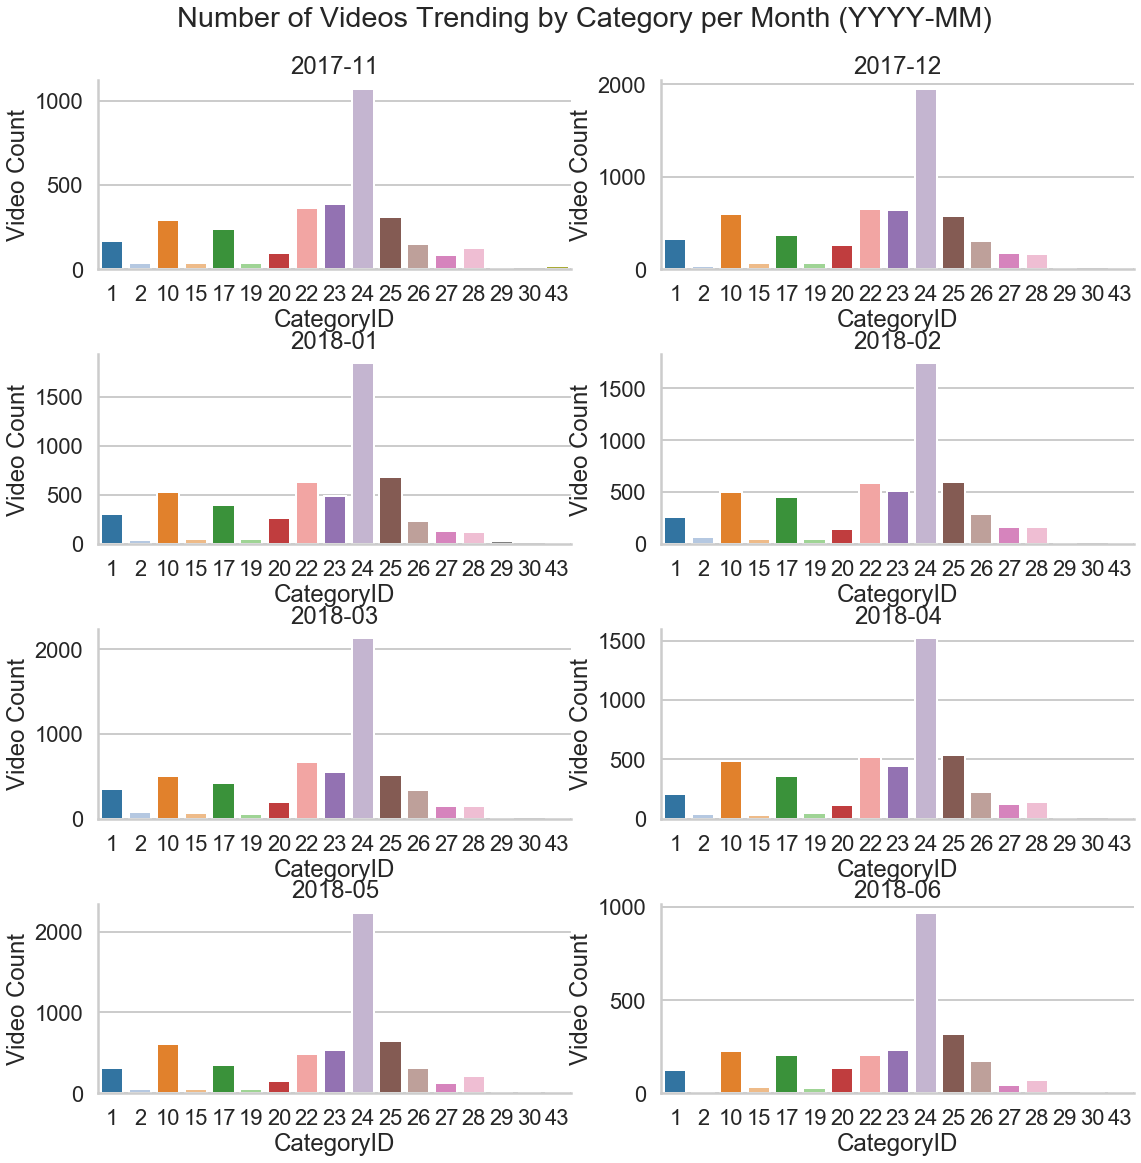

In [35]:
count_TrendCatMonth = sns.catplot(col='TrendingMonth',data=df,kind='count',x='CategoryID',
                                  col_wrap=2,sharex=False,sharey=False,
                                  height=4,aspect=2,palette='tab20')
count_TrendCatMonth.fig.suptitle('Number of Videos Trending by Category per Month (YYYY-MM)',y=1.02)
count_TrendCatMonth.set_titles('{col_name}',y=0.08)
count_TrendCatMonth.set(xlabel='CategoryID',ylabel='Video Count')


## Code Attempts: A better visualization of the number of trending videos according to `CategoryID` over a period of `TrendingMonths`. To do this I intend to do a `scatterplot`, the x-axis representing the `TrendingMonths`, the y-axis representing the number of videos, and the different lines representing the different `CategoryIDs`.

First I created a `DataFrame` specifically for this, using the `pd.crosstab` function:

`data_TrendCatMonth = pd.crosstab(df.CategoryID,df.TrendingMonth)`

The resulting `DataFrame` had `index=CategoryID`, `columns=TrendingMonth`, and the values were the number of videos

### Attempts:

`sns.lineplot(y=data_TrendCatMonth,hue='CategoryID)`

Which reported an error. The error was fixed using `dashes=False`, because without setting the parameter to `False`, there was a limit of 6 lines that could be drawn. Why the error was related to `TrendingMonth` rather than the `CategoryID` is another matter that remains to be seen, however.

Ultimately, after a lot of Googling, it was determined that I had been using the **wrong kind of plot**, like an idiot, and that is why I couldn't get this to work after many hours. Thus, my hours were wasted and I continued onward in my journey to enlightenment.



In [36]:
data_TrendCatMonth = pd.crosstab(df.CategoryID,df.TrendingMonth)
data_TrendCatMonth

#line_TrendCatMonth = sns.lineplot(data=data_TrendCatMonth,hue='CategoryID',dashes=False,legend=False)

TrendingMonth,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
CategoryID,,,,,,,,
1,166,328,300,261,355,206,317,127
2,35,37,39,62,77,40,49,14
10,292,592,526,496,501,483,612,229
15,35,61,53,45,60,28,54,33
17,236,371,393,449,424,361,346,207
19,34,68,51,49,58,50,56,26
20,93,257,259,144,197,111,148,135
22,362,649,628,582,670,518,490,206
23,386,638,490,507,549,441,531,231


# Conclusion

In conclusion, the most frequently posted videos on YouTube are entertainment related, 
the tag “funny” being the most popular tag by the count of 3416, followed by “comedy” with 2432 tagged videos.
However the videos that get the highest amount of views are not comedy related, instead they are music or movies. 
Which makes sense as those channels tend to have the highest amount of subscribers. 
It appears that it is much more likely for a comedy / funny video, assuming it is in the Entertainment category, to trend than anything else, 
the next popular category appears to be politics related, but it is also the most controversial. Meaning that, if you would like to make a trending YouTube video in canada, your chances are the highest if it falls within the Entertainment category.  

Looking back at our initial plan for the project, we only managed to look at a fraction of what we had originally planned, since we weren't able to incorporate analysis that spanned accross different cultures. This was due to technical difficulties involved our personal machines due to the sheer amount of Data included in those sets.

### Now what did we actually accomplish?  
We did answer quite a few of our initial research questions such as "What tags are the most common?", "What genres of videos are most common?" We also looked at overall trends among the videos and patterns in trending videos in general which allowed us to gain insight on patterns and trends. We also became much more familiar with pandas and python in general. And through our analysis and exploration of this dataset we discovered the multidisciplinary nature of data science.

However there were questions we could've answered, but did not have the time to, which we would like to expand on if we had more time. Such as:
Originally we had planned to look at the times videos were posted and I believe that is still an analysis that could be made - something perhaps to be looked at in the future. I also believe a more detailed analysis on the channels who specifically trended most often (we did look at the videos that trended most often, but not the specific channels) could be interesting. Those two are certainly questions we would like to discover answers to eventually. And in the end - there are still many mysteries to the YouTube trending algorithm - to such an extend that many claim they are handpicked. However during our analysis we found nothing concrete, as of yet, that would be indicative of such. 


